In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/home/jose/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jose/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jose/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


**Gausian Naive Bayes**
*the  assumption is tha data from each label is drawn from a simple Gaussian distribution*

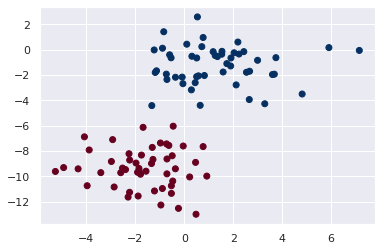

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap="RdBu")

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [8]:
X.shape

(100, 2)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

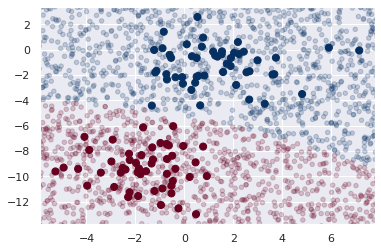

In [21]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu")
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap="RdBu", alpha=0.2)
plt.axis(lim)

In [25]:
yprob = model.predict_proba(Xnew)
yprob[-10:].round(2)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

**Multinomial Naive Bayes** assumes multinomial distribution

*E.G.* Classifying text

In [26]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [29]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [30]:
# grab a few categories
categories = [
    'sci.space',
    'soc.religion.christian',
    'talk.religion.misc',
    'comp.graphics'
]
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="train", categories=categories)

In [31]:
print(train.data[2])

From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)
Subject: Re: nuclear waste
Organization: Texas Instruments Inc
Lines: 34

In <1psg95$ree@access.digex.net> prb@access.digex.com (Pat) writes:

[On the issue of 'burning' nuclear wastes using particle beams...]

>How is it ever going to be an Off- the Shelf Technology if someone doesn't
>do it?  Maybe we should do this as part of the SSF design goals. ;-)

>Gee fred.  After your bitter defense of 20 KHz power as a Basic technology
>for SSF, Id think you would support a minor research program like
>this.

I sometimes wonder if your newsfeed gives you different articles than
everyone else, Pat.  Just a *few* corrections:

1) I never 'defended' 20kHz power, other than as something reasonable
to GO LOOK AT.

2) I have also never opposed a *research project* into feasibility of
the spalling reactor approach to 'cleaning' nuclear waste -- I simply
doubt it could be made to work in the Real World (tm), which ought to
become clear fairly q

***
*vectorize with TF-IDF and atach it to a pipeline with MNB*

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [34]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [37]:
train.target

(2153,)

Text(52.940000000000005, 0.5, 'predicted label')

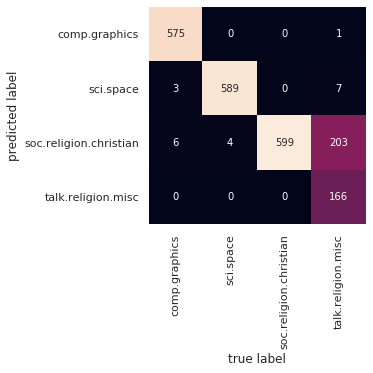

In [45]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
_ = sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
               xticklabels=train.target_names, yticklabels=train.target_names)
_.set_ylim(4, 0)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [46]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [47]:
predict_category("I love cats")

'soc.religion.christian'

In [48]:
predict_category("""Evidently, even this very simple classifier can successfully separate space talk from
computer talk, but it gets confused between talk about religion and talk about Chris‐
tianity. This is perhaps an expected area of confusion!""")

'soc.religion.christian'

In [49]:
predict_category("""Remember that this is nothing more sophisticated than a simple probability model
for the (weighted) frequency of each word in the string; nevertheless, the result is
striking. Even a very naive algorithm, when used carefully and trained on a large set
of high-dimensional data, can be surprisingly effective""")

'sci.space'

In [51]:
predict_category("this is a rectangle of 500 pixels in height")

'comp.graphics'